# ITMAL Exercise

REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0206| CEF, added Kaggle dataset exercise. 

## Vanilla Datasets

There are a number of popular datasets out-there, that are used again and again for small scale testing in ML: most popular are Moon, MNIST, Iris and CIFAR(10/100). We will use the three first here. 

(More on ML datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)

### Moon

<img src="Figs/moon.png" style="width:400px">

#### Qa Data load function 

We begin with a 100% synthetic dataset called moon. It creates two interleaved half-moon like datasets, and is frequently used as an XOR-like problem set (especially in Deep Learning).  

Create a `MOON_GetDataSet()` that generates moon data, based on Scikit-learn's `make_moon()` function.

Extend the `MOON_GetDataSet()`function signature to include some of the parameters found in `make_moon()`, like 'n_sample'.

Also create a `MOON_Plot()` function, that plots the data...good thing here is that the feature set is 2D and easy to handle!

X.shape= (200, 2) , y.shape= (200,)


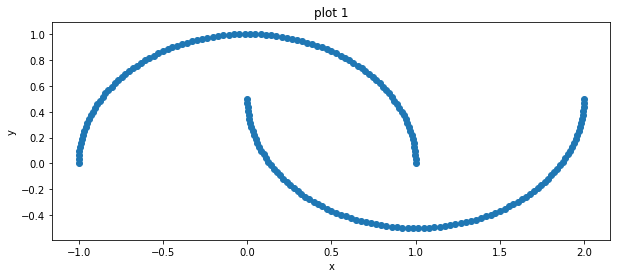

In [1]:
# TODO: Qa...

# NOTE: some free help here regarding import clauses...
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

def MOON_GetDataSet(n_samples):
    # TODO: your code here...
    return make_moons(n_samples)
def MOON_Plot(X, y, title="My title" , xlable="", ylabel=""):
    # TODO: some simple plot commands,

    plt.figure('one', figsize=(10,4))
    plt.scatter(X[:,0],X[:,1])
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.show()
                    
                    
# TEST CODE:
X, y=MOON_GetDataSet(n_samples=200)
print("X.shape=",X.shape,", y.shape=",y.shape)
MOON_Plot(X,y, "plot 1", 'x' , 'y')

#### Qb Try it with a  train-test split function

Now, use a train-test split function from Scikit-learn, that is able to split a `(X, y)` dataset tuple into a train-set and a test-set. 

Plot the train and test data using your `MOON_Plot` function.

Extend the plot function to add a plot title and x- and y-labels to the plot, say as default parameters

```python 
def MOON_Plot(X, y, title="my title", xlable="", ylabel=""):
    # implementation here...
```

or similar. Use the titles "train" and "test" when plotting the train and test data.

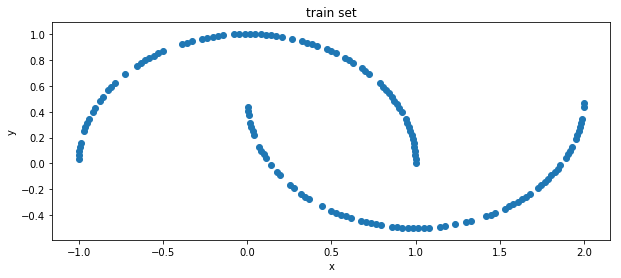

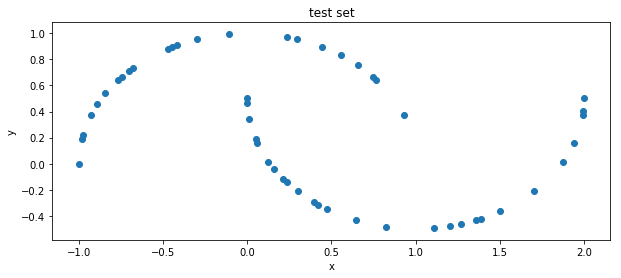

In [2]:
# TODO: Qb....
    
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

MOON_Plot(X_train,y_train, 'train set' , 'x' , 'y')
MOON_Plot(X_test, y_test, 'test set' , 'x' , 'y')

### MNIST

MNIST is a set of 70000 handwritten digits. It is used intensively as a form of "Hello World" dataset and estimator intensively check in Machine Learning. 

<img src="Figs/mnist.png" style="width:400px">

<!-- ![MNIST](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/220px-MnistExamples.png)-->


https://en.wikipedia.org/wiki/MNIST_database

#### Qc Data load function 

Now for the MNIST data set, creating an easy to use data-loader, `MNIST_GetDataSet()`.

There are several ways of getting the MNIST dataset. You could base the data loader on the `fetch_mldata('MNIST original')` function or try to use the `keras.datasets.mnist.load_data()` function. 

The later function pre-splits into a train-test set, and to be compatible with the former, you must concatenate the train-test and return a plain `X, y` set. 

Also create a `MNIST_PlotDigit()`, that is able to plot a single digit from the dataset, and try to plot some of the digits in the dataset (set TEST CODE below).

In [3]:
# fetch once , takes long
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_mldata
print('started')
mnist = fetch_openml('mnist_784', version=1, cache=True)
print('loaded')

started
loaded


X.shape= (70000, 784) , y.shape= (70000,)


D:\programmer\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train.shape= (50000, 784) , X_test.shape= (20000, 784)


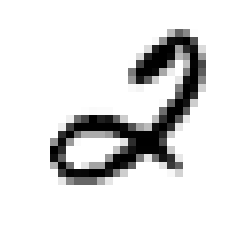

In [4]:
# TODO: Qc...

## from keras.datasets import mnist
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist = fetch_mldata('MNIST original')


def MNIST_PlotDigit(data):

    image = data.reshape(28, 28)
    # TODO: add plot functionality for a single digit...
    plt.imshow(image, cmap = plt.cm.binary,
    interpolation="nearest")
    plt.axis("off")
    plt.show()

def MNIST_GetDataSet():
    # TODO: use mnist = fetch_mldata('MNIST original') or mnist.load_data(),
    #       but return as a single X-y tuple 
    return (mnist['data'], mnist['target'])


# TEST CODE:
X, y = MNIST_GetDataSet()
print("X.shape=",X.shape, ", y.shape=",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, shuffle=True, random_state=42) # random state set, so data dosent change every time

print("X_train.shape=",X_train.shape,", X_test.shape=",X_test.shape)
MNIST_PlotDigit(X_train[3000])

## Iris

Finally, for the iris data set: a four-dimension data set for 150 iris flowers, original created by  biologist Ronald Fisher and published via a paper in 1936.

<img src="Figs/iris.jpg" style="width:400px">

<!-- https://en.wikipedia.org/wiki/File:Iris_versicolor_3.jpg -->
<!-- ![biologist Ronald Fisher](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/R._A._Fischer.jpg/200px-R._A._Fischer.jpg) -->

https://en.wikipedia.org/wiki/Iris_flower_data_set

#### Qd Data load function 

Creating the iris data loader, `IRIS_GetDataSet()`, this time we use the iris loader located in `sklearn.datasets.load_iris()`.

In [81]:
# TODO: Qd...
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

#### Qe Examine the data via scatter plots

Now, as a data-scientist, it is always good to get some grasp on how your data looks like. For the iris data we now want to plot some of the features-against-some-of-the other-features to see how they separate in the given 2D-feature space.

A scatter plot for all iris features against all other may look like

<img src="Figs/Iris_dataset_scatterplot.svg.png" style="width:400px">

Create a plot function that takes just two feature dimensions and plots them in a 2D plot, and plot all features against all others (resembling the "Iris Data" scatter plot just above).

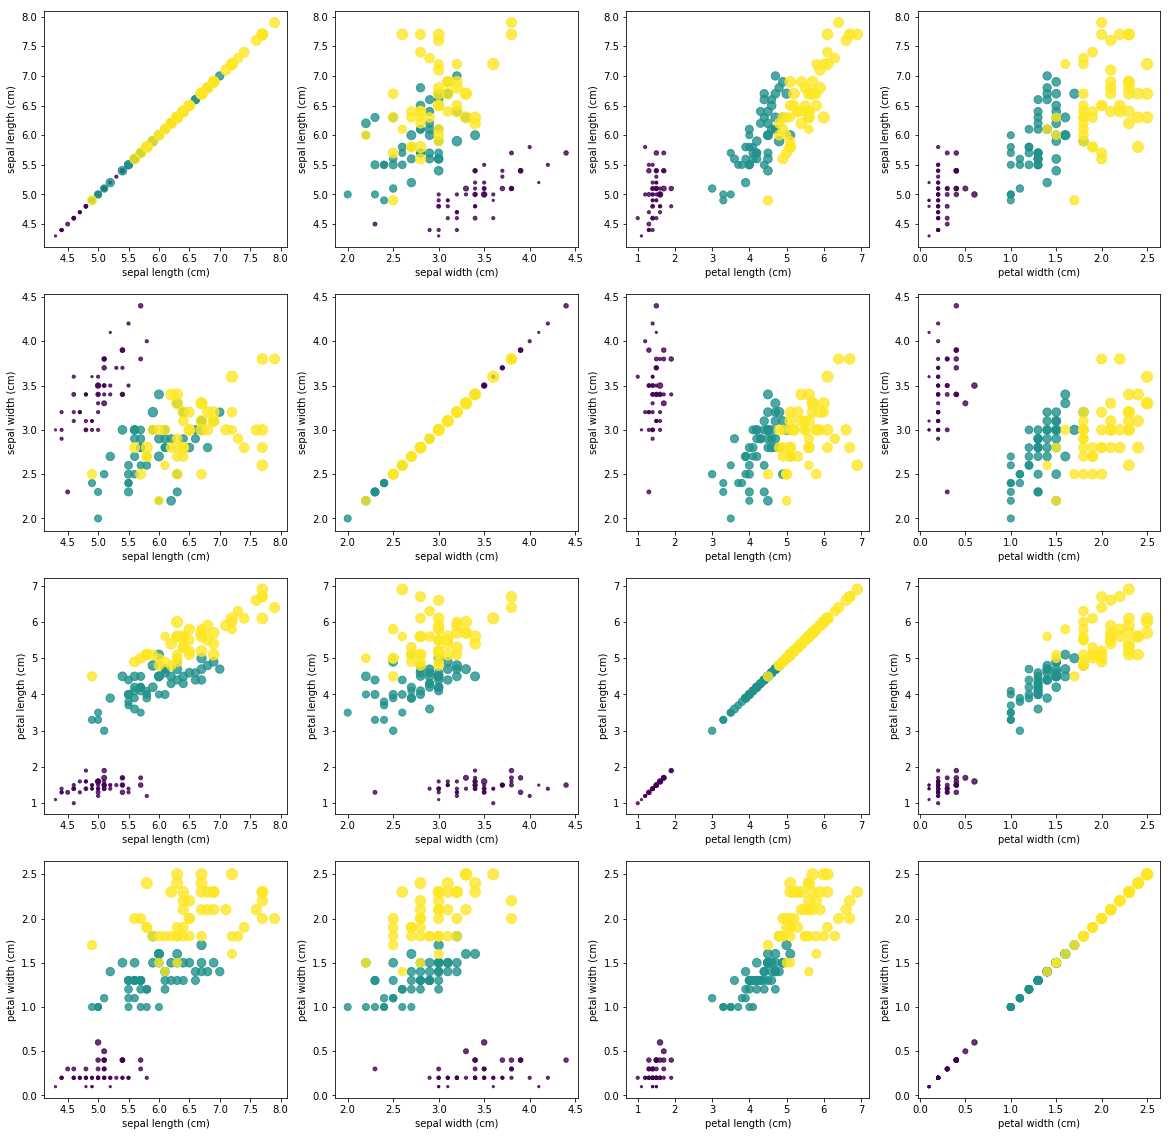

In [148]:
# TODO: Qe...
import matplotlib.pyplot as plt

def plot(k):
    size = len(k.data[0])
    plt.figure(figsize=(20,20))
    counter = 0;
    for z in range(0,size):
        for i in range(0,size):
            counter = counter + 1
            plt.subplot(4,4, counter)
            plt.scatter(k.data.T[i], k.data.T[z], c=k.target, s=50*petalWidth, alpha=0.8, cmap='viridis')
            plt.xlabel(k.feature_names[i])
            plt.ylabel(k.feature_names[z])
    
plot(iris)
    

#### Qf Add your function to the `libitmal` python module

Add all your moon, MNIST and iris get and plot functions to the `libitmal` module. Call the file `dataloaders.py`, and test it in a ___new___ jupyter notebook (you need to reset the notebooks to be able to see if you are calling _cached_ version of the functions or the new ones, with similar names, in the lib module).

You will use these data loaders later, when we want to train on small datasets.

In [3]:
# TODO: Qf...
#how to import Dataloader
import sys,os
sys.path.append(os.path.expanduser('~/Desktop/Uni_noter/6_semester/ML/MachineLearning'))

import Dataloader

# how to call func:
#Dataloader.MOON_GetDataSet(100)

ready to use


(array([[ 3.27699110e-01, -2.40277997e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [ 9.00968868e-01,  4.33883739e-01],
        [ 8.20998618e-03,  3.72122838e-01],
        [-4.62538290e-01,  8.86599306e-01],
        [ 8.01413622e-01,  5.98110530e-01],
        [ 1.99179001e+00,  3.72122838e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [-2.84527587e-01,  9.58667853e-01],
        [ 4.62538290e-01,  8.86599306e-01],
        [ 9.67294863e-01,  2.53654584e-01],
        [ 1.98155916e+00,  3.08841371e-01],
        [ 8.40400105e-01, -4.87181783e-01],
        [ 1.62348980e+00, -2.81831482e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [ 2.84527587e-01,  9.58667853e-01],
        [ 1.34536505e+00, -4.38468422e-01],
        [ 3.76510198e-01, -2.81831482e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 7.61445958e-01,  6.48228395e-01],
        [ 8.38088105e-01,  5.45534901e-01],
        [ 9.91790014e-01,  1.27877162e-01],
        [ 1.84408430e-02,  3.088

## Your Datasets

OK, now you need to find a dataset of your own! 

Goto www.kaggle.com and find a suitable dataset, that you want to work with. We want a set somewhat larger that iris or nmist but it should not be too big. 

You need to create an account at Kaggle before you download.

One example could be the beer consumption in Sao Paulo:

> https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/version/2

It is a 'small-data' set, download gives a 5Kb comma-separated file (CSV)...


#### Qg Download a data set and do some data exploration of it

You are now a Data Scientist, go an examine your data, perhaps creating some feature scatter plots, just like the ones we just made for iris...

Are there `null`s or not-a-number data in your set? Do you have to filter these out before training?

Try to train-test split the set, perhaps just on a small set of its feature depending on the size of your data (small/medium/large/big), and try out one or two Scikit-learn ML algorithms on it just to see if it is possible.

(We return to the data set and training later...)

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')


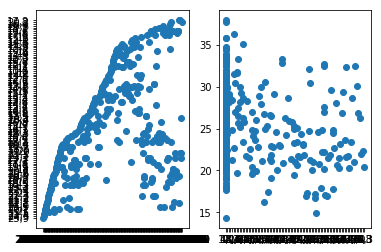

In [258]:
# TODO: Qg

import pandas as pd
import matplotlib.pyplot as plt




x = pd.read_csv('beer-consumption-sao-paulo/Consumo_cerveja.csv')

x = x.dropna() # filter out NA

print(x.keys())



plt.subplot(1,2,1)
plt.scatter(x['Data'], x['Temperatura Minima (C)'])
plt.subplot(1,2,2)
plt.scatter(x['Precipitacao (mm)'], x['Consumo de cerveja (litros)'])
